# Retail Sales Prediction


## Problem Statement:
* XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
* You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## Data Dictionary-1
* Id - an Id that represents a (Store, Date) duple within the set
* Store - a unique Id for each store
* Sales - the turnover for any given day (Dependent Variable)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* State Holiday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* School Holiday - indicates if the (Store) was affected by the closure of public schools
* Store Type - differentiates between 4 different store models: a, b, c, d

## Data Dictionary- 2
* Assortment - Describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* Competition Distance – the distance in meters to the nearest competitor store
* Competition Open Since[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0= store is not participating, 1 = store is participating
* Promo2  Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* Promo Interval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, and November of any given year for that store.

# Import Libraries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Preprocessing

In [3]:
# Load the datasets
sales_data = pd.read_csv("Salesdata.csv")
store_data = pd.read_csv("store.csv")

In [4]:
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [5]:
sales_data.shape

(1017209, 9)

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
sales_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
sales_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_data.shape

(1115, 10)

In [11]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
# filling competition distance with the median value
store_data["CompetitionDistance"].fillna(store_data["CompetitionDistance"].median(),inplace = True)

In [14]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_data["CompetitionOpenSinceMonth"].fillna(store_data["CompetitionOpenSinceMonth"].mode()[0],inplace = True)

In [15]:
store_data["CompetitionOpenSinceYear"].fillna(store_data["CompetitionOpenSinceYear"].mode()[0],inplace = True)

In [16]:
# imputing the nan values of promo2 related columns with 0
store_data["Promo2SinceWeek"].fillna(value = 0,inplace = True)

In [17]:
store_data["Promo2SinceYear"].fillna(value = 0,inplace = True)

In [18]:
store_data["PromoInterval"].fillna(value = 0,inplace = True)

In [19]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [20]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,7.788341,2010.043946,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,2.779130,5.500844,0.500078,15.542241,1006.038782
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,9.000000,2012.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Feature Engineering

In [21]:
sales_data["Date"] = pd.to_datetime(sales_data["Date"],format = "%d-%m-%Y")

In [22]:
state_holiday_mapping = {"0" : 0,"a" : 1,"b" : 2,"c" : 3}
sales_data["StateHoliday"] = sales_data["StateHoliday"].astype(str).map(state_holiday_mapping)

In [23]:
#Merge datasets on 'Store' column
merged_data = pd.merge(sales_data,store_data,on = "Store",how = "left")

In [24]:
# Create new time-based features in merged_data
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['WeekOfYear'] = merged_data['Date'].dt.isocalendar().week
merged_data['IsWeekend'] = merged_data['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

In [25]:
# Create lagged features for 'Sales' (lag of 1, 2, 3 days)
merged_data['Lag1_Sales'] = merged_data['Sales'].shift(1)
merged_data['Lag2_Sales'] = merged_data['Sales'].shift(2)
merged_data['Lag3_Sales'] = merged_data['Sales'].shift(3)

In [26]:
merged_data.dropna(inplace=True)

In [27]:
merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend,Lag1_Sales,Lag2_Sales,Lag3_Sales
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,0,2015,7,31,31,0,8314.0,6064.0,5263.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0.0,0,2015,7,31,31,0,13995.0,8314.0,6064.0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,0.0,0,2015,7,31,31,0,4822.0,13995.0,8314.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,0.0,0,2015,7,31,31,0,5651.0,4822.0,13995.0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,0.0,0,2015,7,31,31,0,15344.0,5651.0,4822.0


# Exploratory Data Analysis (EDA)

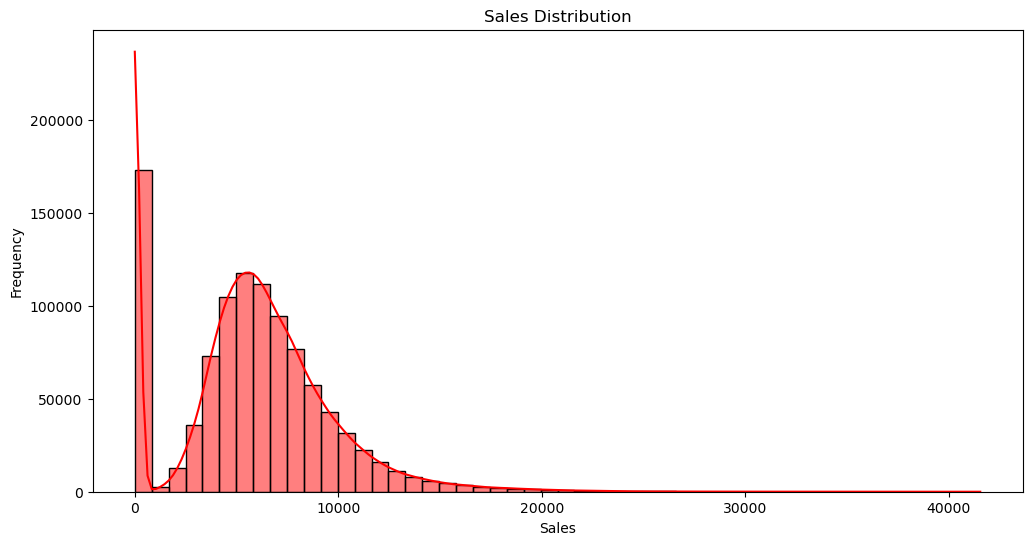

In [28]:
# Sales Distribution
plt.figure(figsize = (12,6))
sns.histplot(data = merged_data["Sales"],bins = 50,kde = True,color = "Red")
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

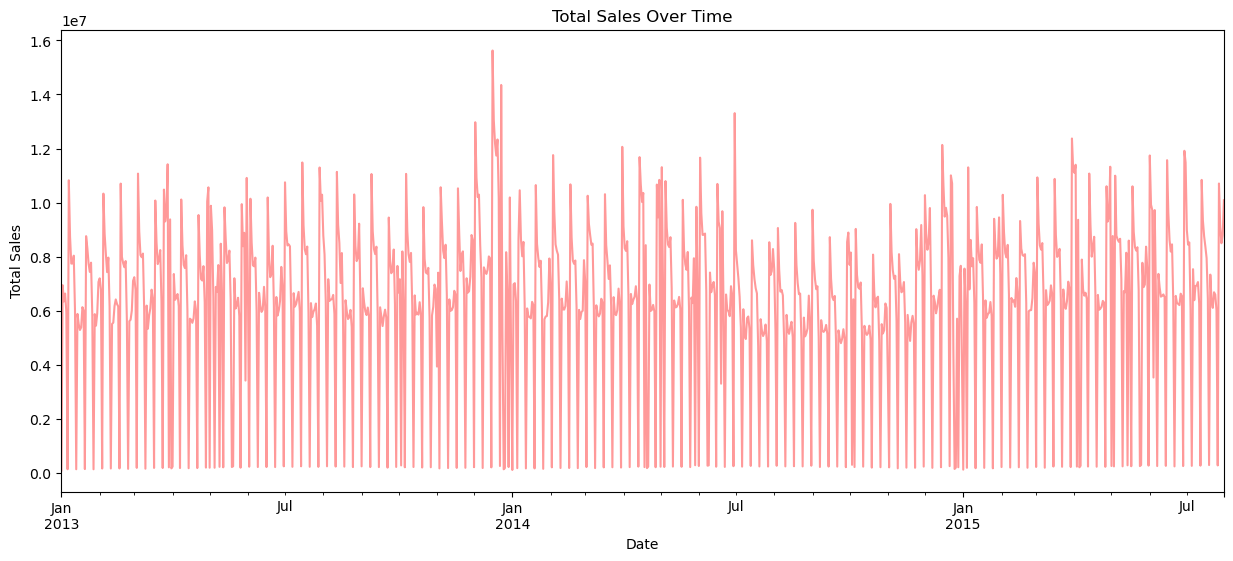

In [30]:
# Sales Over Time
plt.figure(figsize=(15, 6))
merged_data.groupby('Date')['Sales'].sum().plot(color='#FF9999')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

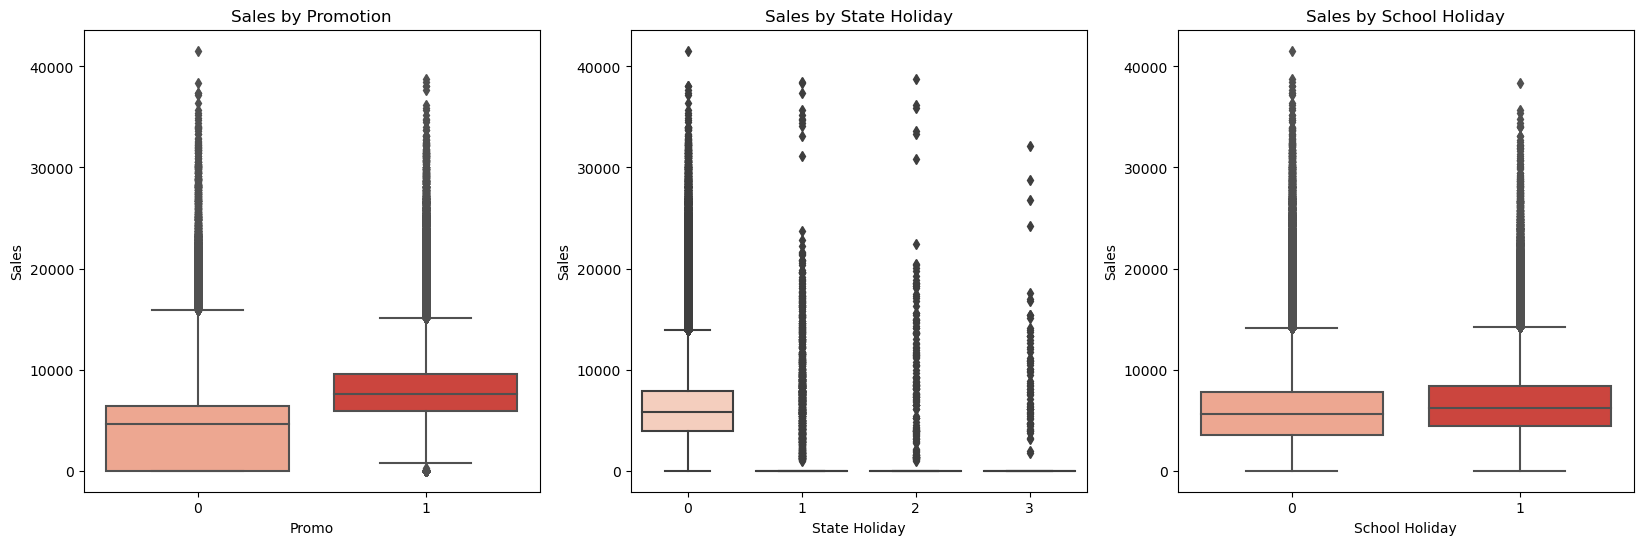

In [28]:
# Promotions and Holidays Impact
fig, axes = plt.subplots(1,3,figsize = (20,6))

sns.boxplot(x = "Promo",y = "Sales",data = merged_data,ax = axes[0],palette = "Reds")
axes[0].set_title("Sales by Promotion")
axes[0].set_xlabel("Promo")
axes[0].set_ylabel("Sales")

sns.boxplot(x = 'StateHoliday', y = 'Sales', data = merged_data, ax = axes[1],palette = "Reds")
axes[1].set_title('Sales by State Holiday')
axes[1].set_xlabel('State Holiday')
axes[1].set_ylabel('Sales')

sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = merged_data, ax = axes[2],palette = "Reds")
axes[2].set_title('Sales by School Holiday')
axes[2].set_xlabel('School Holiday')
axes[2].set_ylabel('Sales')

plt.show()

# Categorical Features

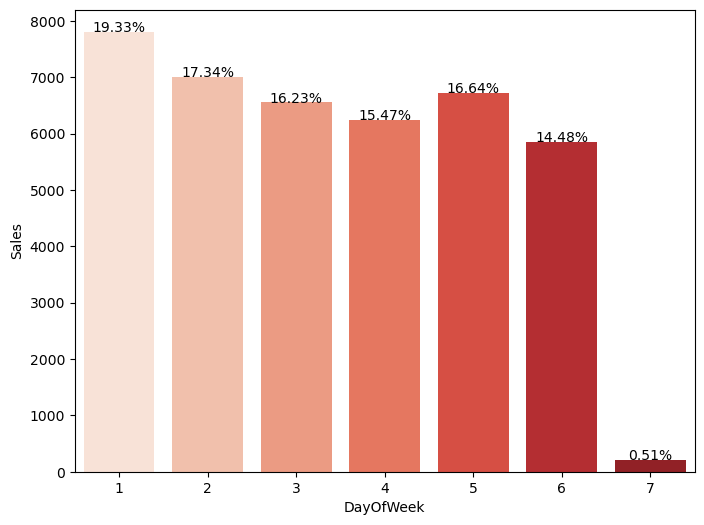

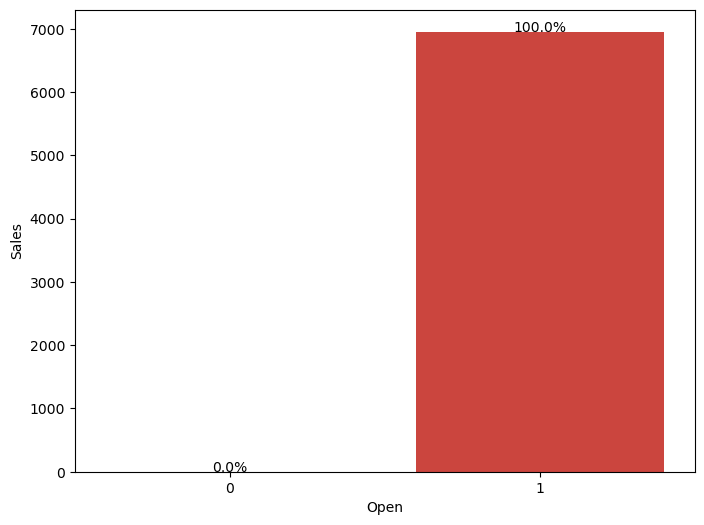

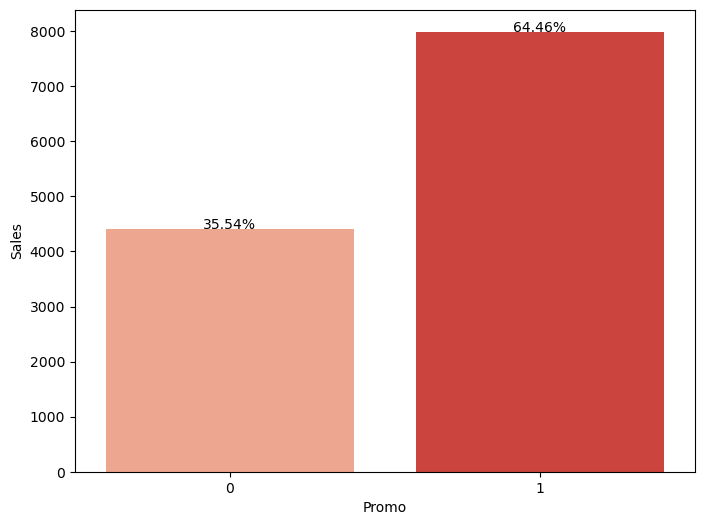

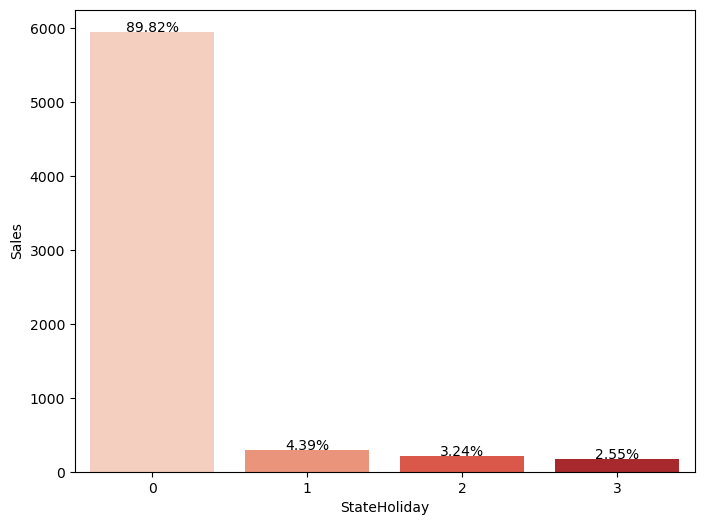

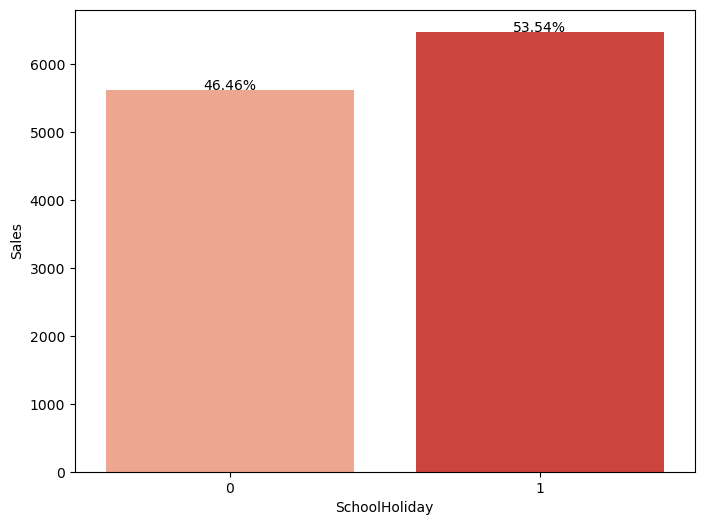

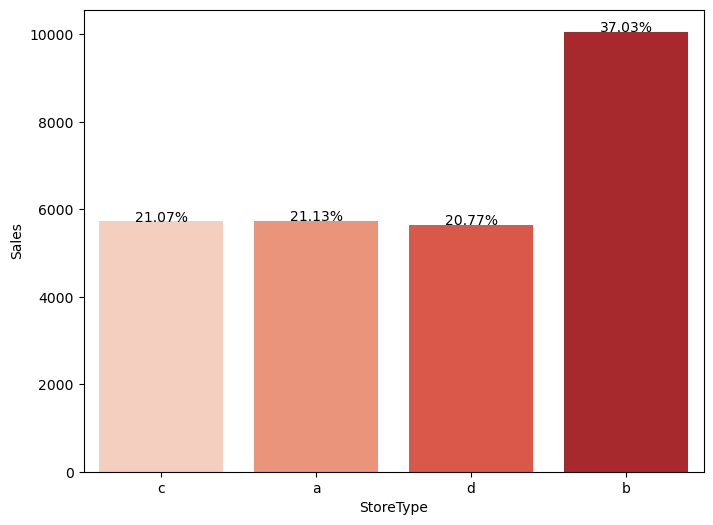

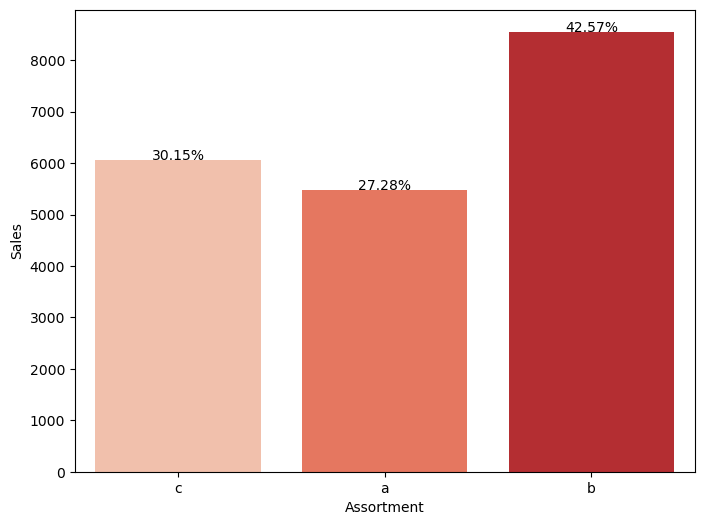

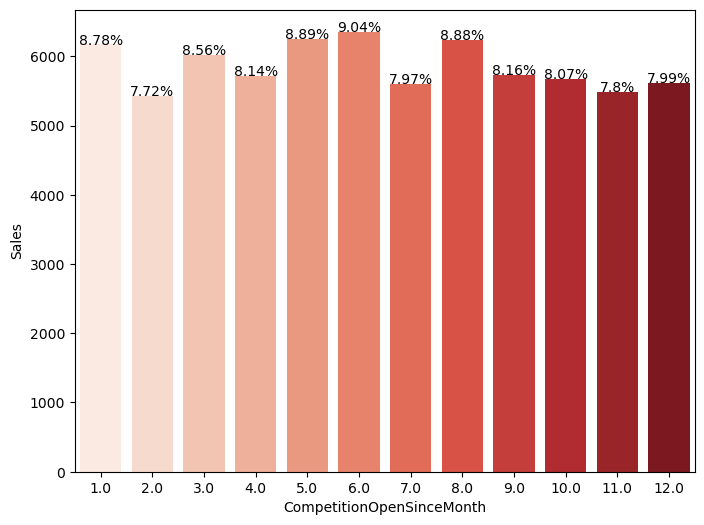

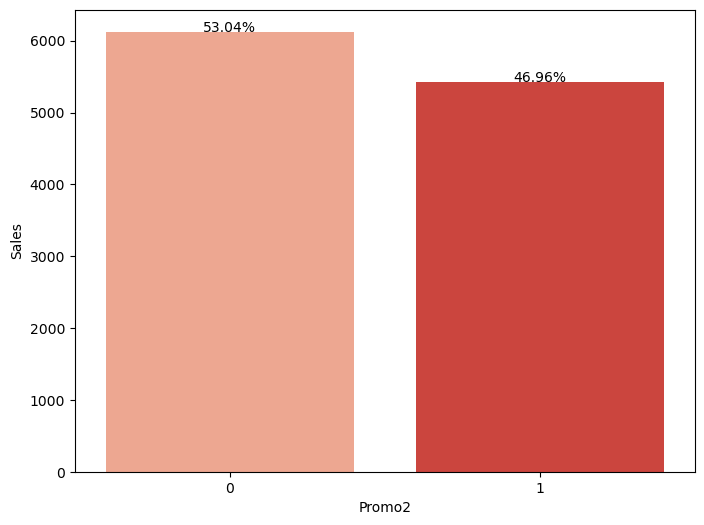

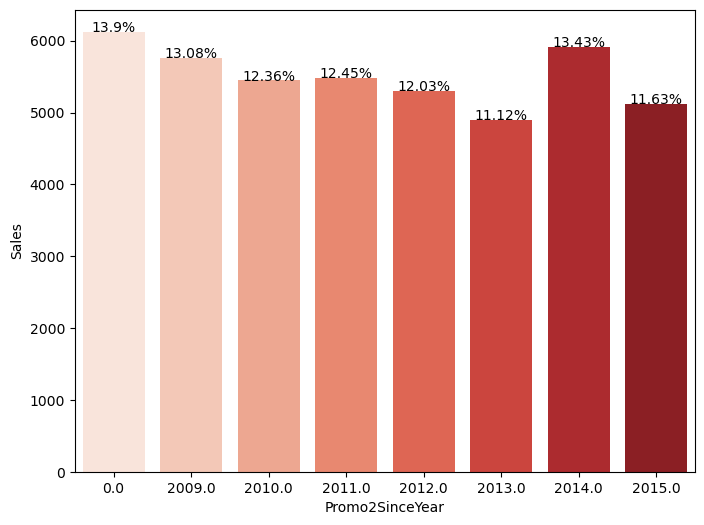

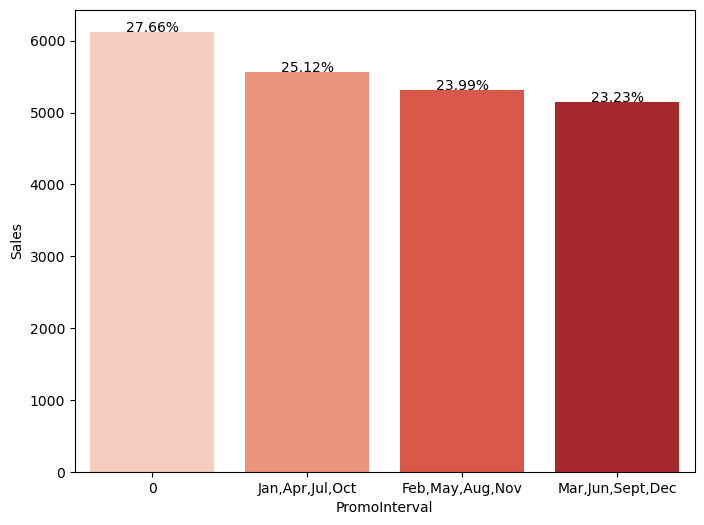

In [29]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them

categorical_variables = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
                         'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceYear', 'PromoInterval']

for value in categorical_variables:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=merged_data[value], y=merged_data['Sales'], errorbar=None, palette="Reds")
    totals = [i.get_height() for i in ax.patches]
    total = sum(totals)
    
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5,
                str(round((i.get_height() / total) * 100, 2)) + '%',
                ha='center', fontsize=10, color='black')
    
    plt.show()

<Axes: xlabel='Open', ylabel='Sales'>

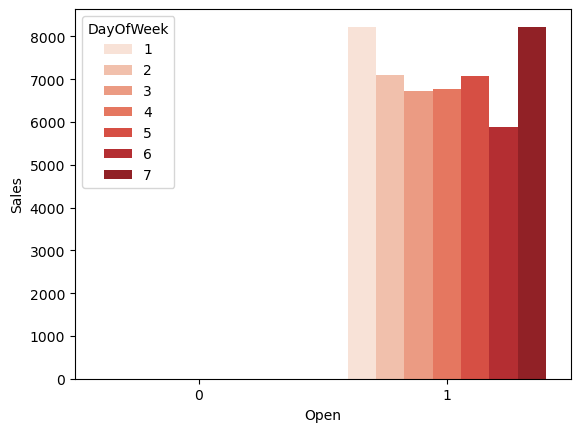

In [30]:
sns.barplot(x = merged_data["Open"],y = merged_data['Sales'],hue = merged_data["DayOfWeek"],errorbar = None,palette = "Reds")

<Axes: xlabel='DayOfWeek', ylabel='count'>

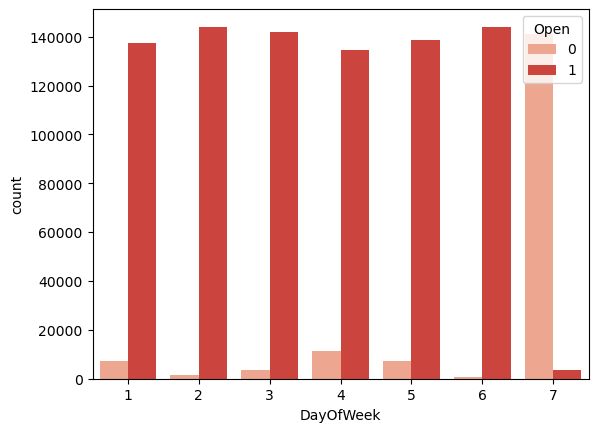

In [31]:
sns.countplot(x = 'DayOfWeek',hue = 'Open',data = merged_data,palette = "Reds")

In [32]:
#Store Type and Sales Exploration
store_type = merged_data.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165320481,363539988
3,d,1765392943,156904995
2,c,783216163,92129150
1,b,159231395,31465621


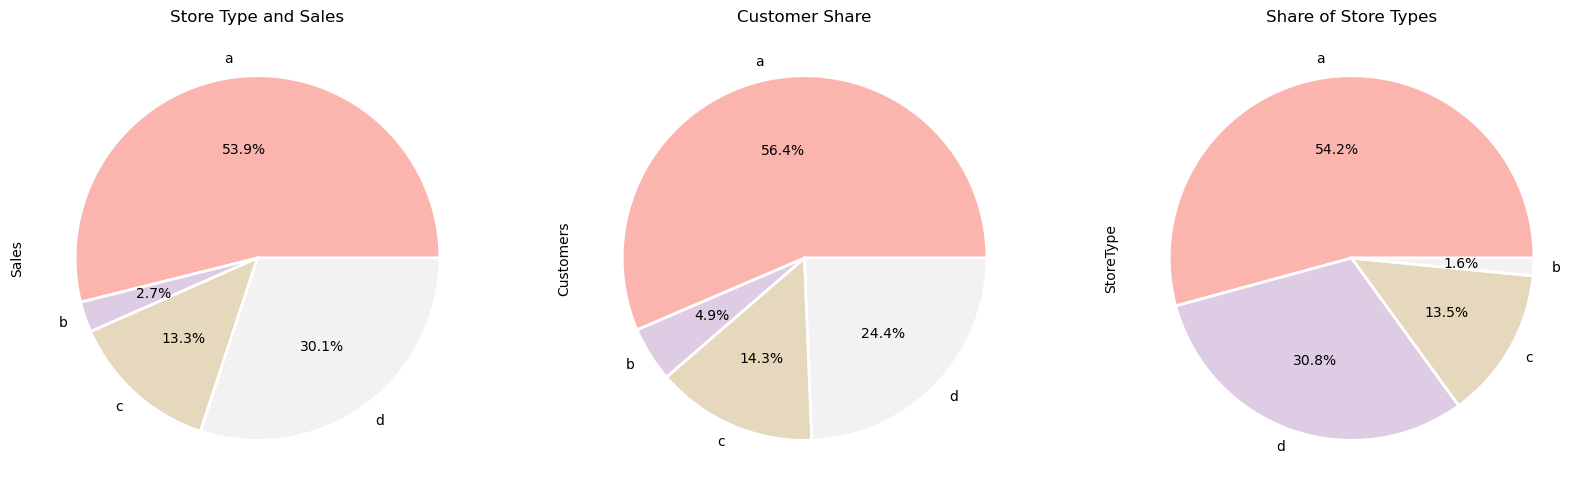

In [33]:
#let's explore store type and it's influence on sales
fig, axes = plt.subplots(1,3,figsize = (20,20))

merged_data.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales',ax = axes[0], autopct='%1.1f%%',cmap = "Pastel1",wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

merged_data.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share',ax = axes[1],autopct='%1.1f%%',cmap = "Pastel1",wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

merged_data["StoreType"].value_counts().plot.pie(title='Share of Store Types',ax = axes[2],autopct='%1.1f%%',cmap = "Pastel1",wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

plt.show()

<Axes: >

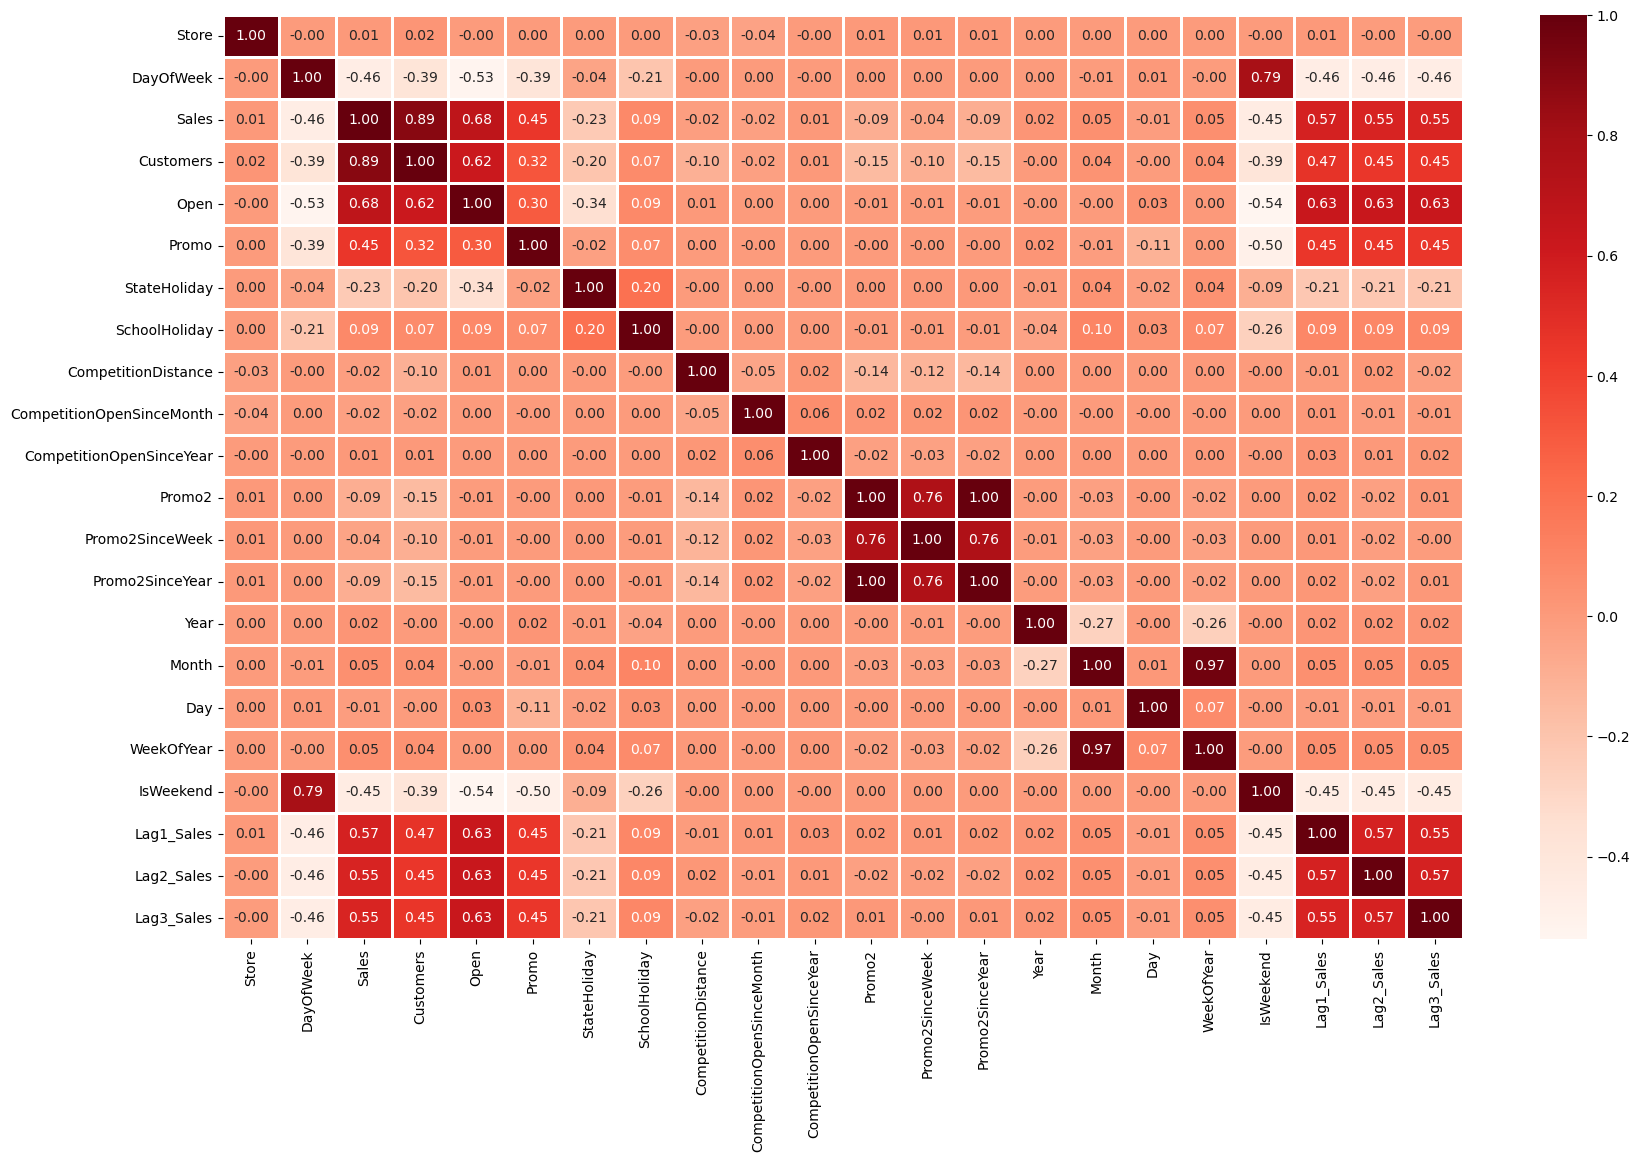

In [34]:
#correlation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(merged_data.corr(), cmap="Reds", annot=True,linewidths=2,fmt=".2f")

<Axes: xlabel='Customers', ylabel='Sales'>

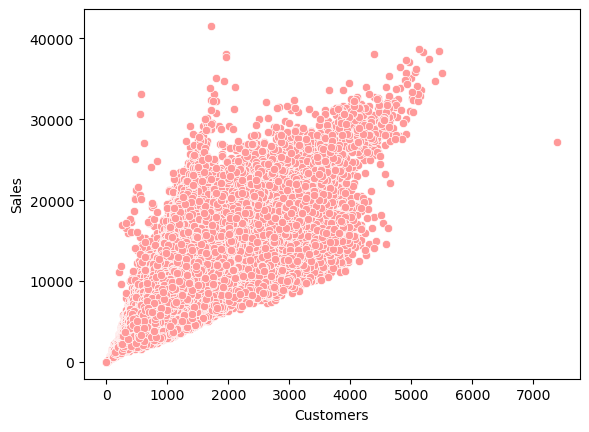

In [35]:
#scatterplot of Customers and Sales
sns.scatterplot(x = merged_data['Customers'], y = merged_data['Sales'],color ="#FF9999")

# Continuous Features

In [36]:
merged_data["Year"].value_counts()

2013    406974
2014    373855
2015    236377
Name: Year, dtype: int64

In [37]:
sales_2013 = merged_data[merged_data['Year']== 2013]
sales_2014 = merged_data[merged_data['Year']==2014]
sales_2015 = merged_data[merged_data['Year']== 2015]

#monthly sales
sales_data_2013 = sales_2013.groupby('Month')['Sales'].sum().reset_index()
sales_data_2014 = sales_2014.groupby('Month')['Sales'].sum().reset_index()
sales_data_2015 = sales_2015.groupby('Month')['Sales'].sum().reset_index()

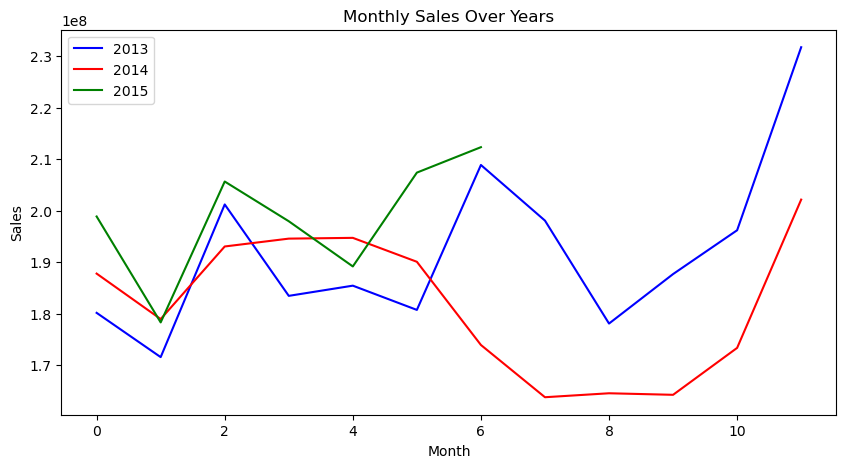

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(sales_data_2013.loc[:, 'Sales'], label='2013', color='Blue')  
plt.plot(sales_data_2014.loc[:, 'Sales'], label='2014', color='Red')  
plt.plot(sales_data_2015.loc[:, 'Sales'], label='2015', color='Green')  

plt.title('Monthly Sales Over Years')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [39]:
(merged_data[merged_data.Open == 0]).shape

(172817, 26)

In [40]:
merged_data_01 = merged_data[merged_data.Open != 0]
merged_data_01.drop('Open', axis=1, inplace=True)

In [41]:
merged_data_01.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend,Lag1_Sales,Lag2_Sales,Lag3_Sales
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,0.0,0,2015,7,31,31,0,8314.0,6064.0,5263.0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,0.0,0,2015,7,31,31,0,13995.0,8314.0,6064.0
5,6,5,2015-07-31,5651,589,1,0,1,a,a,...,0.0,0,2015,7,31,31,0,4822.0,13995.0,8314.0
6,7,5,2015-07-31,15344,1414,1,0,1,a,c,...,0.0,0,2015,7,31,31,0,5651.0,4822.0,13995.0
7,8,5,2015-07-31,8492,833,1,0,1,a,a,...,0.0,0,2015,7,31,31,0,15344.0,5651.0,4822.0


<Axes: ylabel='Density'>

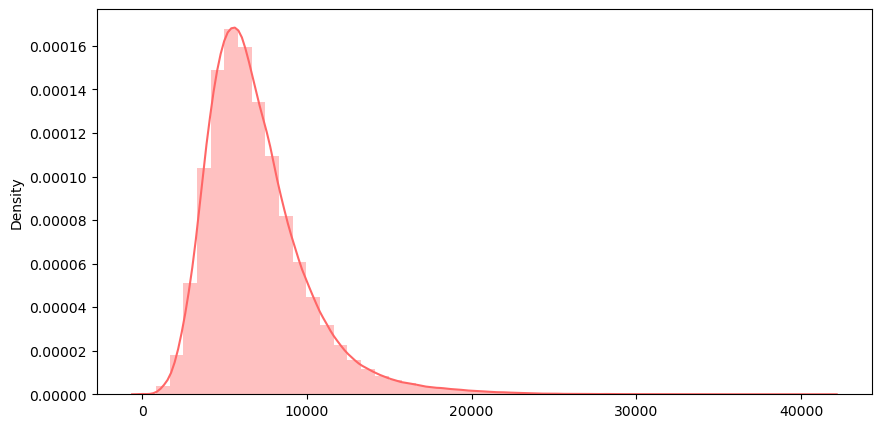

In [42]:
#distribution of Sales as expected positively skewed
plt.figure(figsize=(10, 5))
sns.distplot(x = merged_data_01['Sales'],color="#FF6666")

In [43]:
merged_data_01['Sales'] = np.log(merged_data_01['Sales'])

In [44]:
merged_data_01.dropna(inplace=True)

In [45]:
merged_data_01.drop(merged_data_01[merged_data_01['Sales'] == float("-inf")].index,inplace=True)

<Axes: ylabel='Density'>

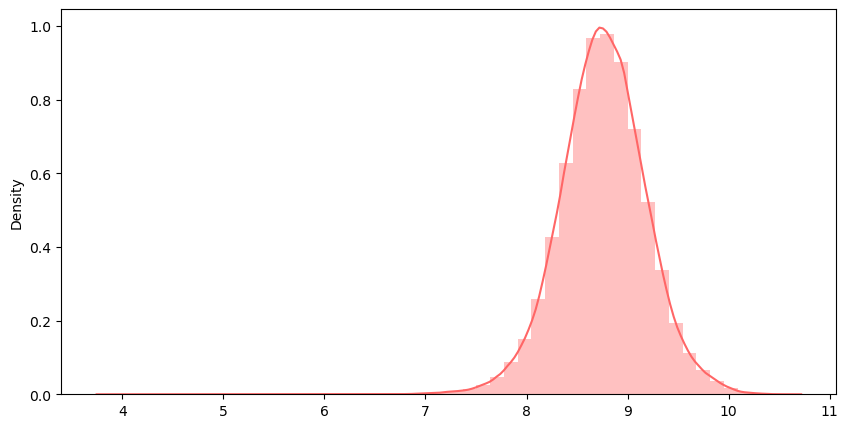

In [46]:
plt.figure(figsize=(10, 5))
sns.distplot(x=merged_data_01['Sales'],color = "#FF6666")

In [47]:
merged_data_01['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [48]:
#combining competition open since month and year into total months
merged_data_01['CompetitionOpen'] = (merged_data_01['Year'] - merged_data_01['CompetitionOpenSinceYear'])*12 + (merged_data_01['Month'] - merged_data_01['CompetitionOpenSinceMonth'])

#correcting the neg values
merged_data_01['CompetitionOpen'] = merged_data_01['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)

#dropping both the columns
merged_data_01.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [49]:
# Create 'Promo2Open' by combining year and week data into total months
merged_data_01['Promo2Open'] = (merged_data_01['Year'] - merged_data_01['Promo2SinceYear']) * 12 + (merged_data_01['WeekOfYear'] - merged_data_01['Promo2SinceWeek']) * 0.230137

# Correcting negative values
merged_data_01['Promo2Open'] = merged_data_01['Promo2Open'].apply(lambda x: 0 if x < 0 else x) * merged_data_01['Promo2']

# Creating a feature to check if promo2 was running in the sale month
def promo2running(row):
    month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    try:
        months = row['PromoInterval'].split(',')
        if month_dict[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

# Applying the function
merged_data_01['Promo2running'] = merged_data_01.apply(promo2running, axis=1) * merged_data_01['Promo2']

# Dropping unnecessary columns
merged_data_01.drop(['Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval'], axis=1, inplace=True)

In [50]:
#setting date and store as index
merged_data_01.set_index(['Date','Store'],inplace=True)

#sorting index following the time series
merged_data_01.sort_index(inplace=True)

In [51]:
merged_data_01.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             2  8.347590        619      0             1   
           259            2  8.832150       1444      0             1   
           262            2  9.756552       2875      0             1   
           274            2  8.039802        729      0             1   
           335            2  7.783641        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  ...  Month  Day  WeekOfYear  IsWeekend  Lag1_Sales  \
Date       Store          ...                                                  
2013-01-01 85          0  ...      1    1           1          0         0.0   
           259         0  ...      1    1           1          0         0.0   
           262         0  ...      1    1           1          0         0.0   
           274         1  ...      1    1           1          0         0.0   
           335         1  ...      1    1           1          0         0.0   

                  Lag2_Sales  Lag3_Sales  CompetitionOpen  Promo2Open  \
Date       Store                                                        
2013-01-01 85            0.0         0.0             15.0         0.0   
           259           0.0         0.0              0.0         0.0   
           262           0.0      6851.0              0.0         0.0   
           274           0.0         0.0              0.0         0.0   
           335           0.0         0.0              0.0         0.0   

                  Promo2running  
Date       Store                 
2013-01-01 85                 0  
           259                0  
           262                0  
           274                1  
           335                1  

[5 rows x 21 columns]

Total number of Outliers present in the Sales column are 1559.


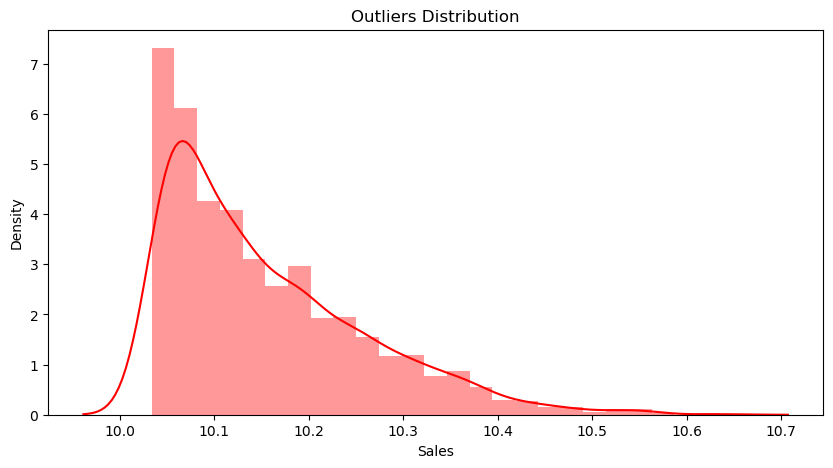

In [52]:
# Calculate mean and standard deviation
mean_sales = np.mean(merged_data_01['Sales'])
sd_sales = np.std(merged_data_01['Sales'])

# Define the threshold for outliers
threshold = 3

# Identify outliers
outliers = merged_data_01['Sales'][((merged_data_01['Sales'] - mean_sales) / sd_sales) > threshold]

# Total number of outliers
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')

# Plotting the outlier distribution
plt.figure(figsize=(10, 5))
sns.distplot(outliers, color='red').set(title='Outliers Distribution')
plt.show()

In [53]:
#percentage of sales greater than 10.2
sales_outliers = merged_data_01.loc[merged_data_01['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(merged_data_01))*100
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.05080921672085132


In [54]:
sales_outliers.head()

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,Month,Day,WeekOfYear,IsWeekend,Lag1_Sales,Lag2_Sales,Lag3_Sales,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0,0,a,a,140.0,0,...,1,7,2,0,8889.0,12868.0,12949.0,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0,0,a,a,140.0,0,...,1,8,2,0,7861.0,12137.0,10398.0,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0,0,a,a,140.0,0,...,1,21,4,0,6825.0,11079.0,9976.0,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0,0,a,a,140.0,0,...,1,22,4,0,6914.0,10156.0,9587.0,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,...,2,3,5,1,0.0,0.0,0.0,0.0,0.0,0


In [55]:
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,Month,Day,WeekOfYear,IsWeekend,Lag1_Sales,Lag2_Sales,Lag3_Sales,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,...,2,3,5,1,0.0,0.0,0.0,0.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,...,2,10,6,1,0.0,0.0,11012.0,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,...,3,3,9,1,0.0,0.0,11542.0,0.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,...,3,10,10,1,0.0,0.0,11663.0,0.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,...,3,17,11,1,0.0,0.0,12778.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,...,6,28,26,1,0.0,0.0,16923.0,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,...,7,5,27,1,0.0,0.0,17285.0,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,...,7,12,28,1,0.0,0.0,15585.0,26.0,0.0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

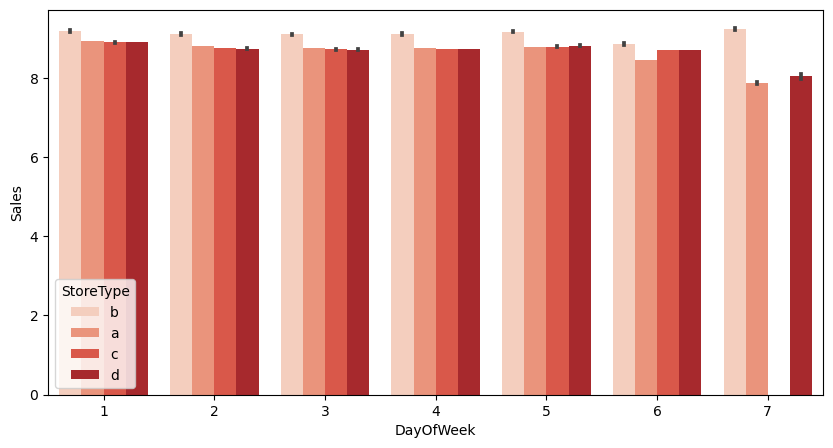

In [56]:
plt.figure(figsize=(10, 5))
sns.barplot(x=merged_data_01['DayOfWeek'],y=merged_data_01["Sales"],hue=merged_data_01['StoreType'],palette = "Reds")

In [57]:
merged_data_01.loc[(merged_data_01['DayOfWeek']==7) & (merged_data_01['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0             0   
           259            7   8.977904       1686      0             0   
           262            7  10.053630       3479      0             0   
           274            7   8.243283        932      0             0   
           335            7   8.883640       1310      0             0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0             0   
           769            7   9.312446       2783      0             0   
           948            7   9.395990       2346      0             0   
           1081           7   8.659734        875      0             0   
           1097           7   9.496045       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  ...  Month  Day  WeekOfYear  IsWeekend  Lag1_Sales  \
Date       Store          ...                                                  
2013-01-06 85          0  ...      1    6           1          1         0.0   
           259         0  ...      1    6           1          1         0.0   
           262         0  ...      1    6           1          1         0.0   
           274         1  ...      1    6           1          1         0.0   
           335         1  ...      1    6           1          1         0.0   
...                  ...  ...    ...  ...         ...        ...         ...   
2015-07-26 733         0  ...      7   26          30          1      5399.0   
           769         1  ...      7   26          30          1         0.0   
           948         0  ...      7   26          30          1         0.0   
           1081        0  ...      7   26          30          1         0.0   
           1097        0  ...      7   26          30          1         0.0   

                  Lag2_Sales  Lag3_Sales  CompetitionOpen  Promo2Open  \
Date       Store                                                        
2013-01-06 85            0.0         0.0             15.0    0.000000   
           259           0.0         0.0              0.0    0.000000   
           262           0.0      7926.0              0.0    0.000000   
           274           0.0         0.0              0.0    0.000000   
           335           0.0         0.0              0.0    0.000000   
...                      ...         ...              ...         ...   
2015-07-26 733           0.0         0.0            189.0    0.000000   
           769           0.0         0.0             22.0   31.857534   
           948           0.0         0.0             22.0    0.000000   
           1081          0.0         0.0            112.0    0.000000   
           1097          0.0         0.0            160.0    0.000000   

                  Promo2running  
Date       Store            

# Prepare Data for Modeling

In [58]:
features = ['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend',
            'Lag1_Sales', 'Lag2_Sales', 'Lag3_Sales']
X = merged_data_01[features]
y = merged_data_01['Sales']

In [59]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model - Decision Tree

In [60]:
# Baseline Model: Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#  Random Forest Model

In [61]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Hyperparameter Tuning

In [62]:
# Random Forest Hyperparameter Tuning
param_grid = {
    'n_estimators': [100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, error_score='raise')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  57.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  56.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  53.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  53.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  52.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100

# Feature Importance for Random Forest

In [63]:
# Feature Importance for Random Forest
feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

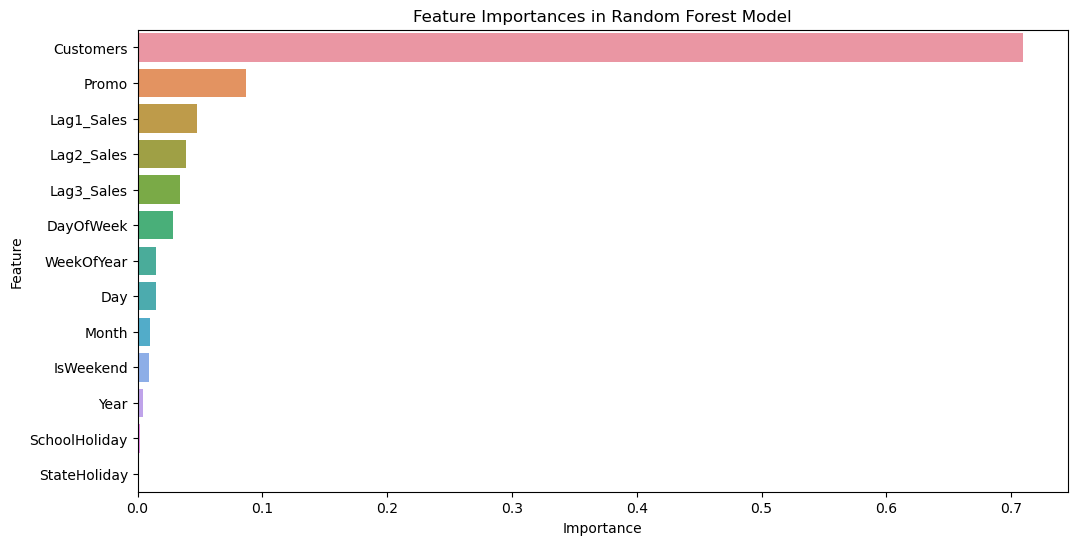

In [64]:
# Visualizing Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

# Model Performance and Evaluation

In [65]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - R^2 Score: {r2}')
    return mse, r2

In [66]:
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt, 'Decision Tree')
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, 'Random Forest')
mse_rf_tuned, r2_rf_tuned = evaluate_model(y_test, y_pred_rf_tuned, 'Random Forest Tuned')

Decision Tree - Mean Squared Error: 0.06447301074908139
Decision Tree - R^2 Score: 0.6444708103565415
Random Forest - Mean Squared Error: 0.03141944432887513
Random Forest - R^2 Score: 0.8267409967130799
Random Forest Tuned - Mean Squared Error: 0.032378813605241
Random Forest Tuned - R^2 Score: 0.821450662394389


In [67]:
models = ['Decision Tree', 'Random Forest', 'Random Forest Tuned']
mses = [mse_dt, mse_rf, mse_rf_tuned]
r2s = [r2_dt, r2_rf, r2_rf_tuned]

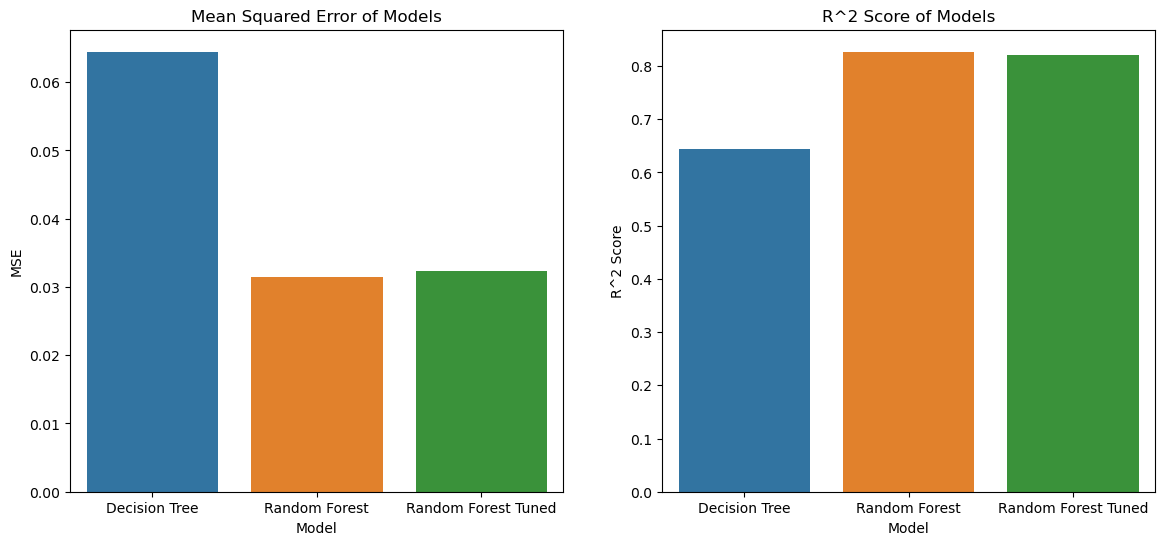

In [68]:
# Visualizing Model Performances
plt.figure(figsize=(14, 6))

# MSE Plot
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mses)
plt.title('Mean Squared Error of Models')
plt.xlabel('Model')
plt.ylabel('MSE')

# R2 Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2s)
plt.title('R^2 Score of Models')
plt.xlabel('Model')
plt.ylabel('R^2 Score')

plt.show()

In [69]:
# Store-wise Sales Predictions
store_predictions = pd.DataFrame({ 'Actual Sales': y_test, 'Predicted Sales': y_pred_rf_tuned})
store_predictions = store_predictions.groupby('Store').agg({'Actual Sales': 'sum', 'Predicted Sales': 'sum'}).reset_index()

In [84]:
# Extracting the first six weeks' data
start_date = merged_data_01['Date'].min()
end_date = start_date + pd.Timedelta(weeks=6)
first_six_weeks = merged_data_01[(merged_data_01['Date'] >= start_date) & (merged_data_01['Date'] <= end_date)]

# Prepare data for predicting first six weeks
X_first_six_weeks = first_six_weeks[features]
y_first_six_weeks = first_six_weeks['Sales']

# Predicting sales for the first six weeks
y_pred_first_six_weeks = best_rf_model.predict(X_first_six_weeks)

# Combining actual and predicted sales
first_six_weeks_results = pd.DataFrame({
    'Date': first_six_weeks['Date'],
    'Store': first_six_weeks['Store'],
    'Actual Sales': y_first_six_weeks,
    'Predicted Sales': y_pred_first_six_weeks
})

# Displaying the results for the first six weeks
first_six_weeks_results.sort_values(by=['Date', 'Store'], inplace=True)
print(first_six_weeks_results)

            Date  Store  Actual Sales  Predicted Sales
0     2013-01-01     85      8.347590         8.145619
1     2013-01-01    259      8.832150         8.867985
2     2013-01-01    262      9.756552         9.704052
3     2013-01-01    274      8.039802         8.224429
4     2013-01-01    335      7.783641         8.017436
...          ...    ...           ...              ...
39949 2013-02-12   1111      8.495152         8.396513
39950 2013-02-12   1112      9.082166         8.708357
39951 2013-02-12   1113      8.519790         8.592008
39952 2013-02-12   1114      9.639782         9.504750
39953 2013-02-12   1115      8.019284         7.990728

[39954 rows x 4 columns]


# Visualizing sales and predictions for the first six weeks

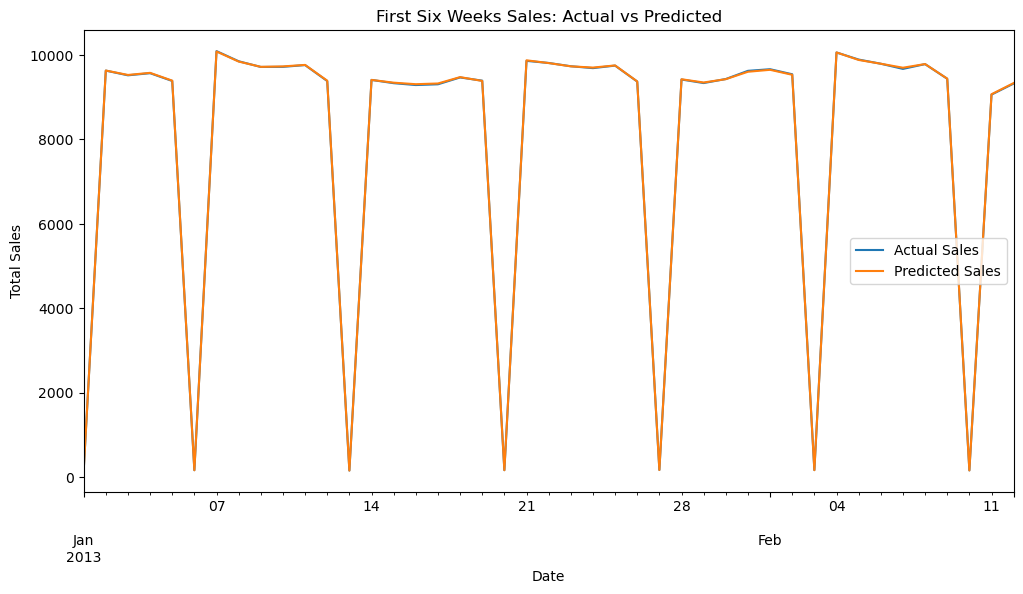

In [86]:
# Visualizing sales and predictions for the first six weeks
plt.figure(figsize=(12, 6))
first_six_weeks_results.groupby('Date')[['Actual Sales', 'Predicted Sales']].sum().plot(ax=plt.gca())
plt.title('First Six Weeks Sales: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [72]:
# Conclusion and Recommendations
print("\nConclusion and Recommendations")
print("The Random Forest performs the best in terms of both MSE and R^2 Score.")
print("Store-wise sales predictions can be used to guide store managers in forecasting future sales more accurately.")


Conclusion and Recommendations
The Random Forest performs the best in terms of both MSE and R^2 Score.
Store-wise sales predictions can be used to guide store managers in forecasting future sales more accurately.


# Observations:

### Data Preprocessing and Feature Engineering
* Date Formatting and Feature Creation: Converting the 'Date' column to a datetime object and creating additional time based features like year, month, day, week of the year helped capture temporal patterns in sales data.
* Lagged Sales Features: Creating lag features (sales from 1, 2, and 3 days prior) allowed the model to learn from recent sales trends, which is crucial for time series data.
* Handling Missing Data: Dropping rows with NaN values and excluding closed stores ensured that the dataset was clean and ready for modeling.

### Exploratory Data Analysis (EDA)
* Sales Distribution: The histogram showed that sales were skewed, with a majority of sales values concentrated at lower ranges. This indicates that most stores have lower daily sales with fewer instances of very high sales.
* Sales Over Time: The time series plot revealed trends and seasonality in sales data, with noticeable fluctuations over time.
* Impact of Promotions and Holidays: Plots indicated that promotions and holidays significantly affect sales. Sales tend to be higher during promotions and state holidays, while school holidays showed a mixed impact.

### Model Performance and Evaluation
* Decision Tree: The Decision Tree model provided a baseline performance but was outperformed by more sophisticated models.
* Random Forest: The Random Forest model showed improved performance over the Decision Tree, indicating that an ensemble method with multiple trees provides better generalization.
* Hyperparameter Tuning: Hyperparameter tuning further enhanced the Random Forest model's performance, highlighting the importance of optimizing model parameters.

### Model Metrics
* Mean Squared Error (MSE): Lower MSE values indicate better model performance. The Random Forest model had the lowest MSE, suggesting it was the most accurate in predicting sales.
* R-squared (R^2) Score: Higher R^2 values indicate better model fit. The Random Forest model had the highest R^2 score, showing it explained the most variance in the sales data.

### Visualizing Model Performances
* The bar plots comparing MSE and R^2 scores across models visually confirmed that the Random Forest model outperformed the other models in both accuracy and explanatory power.


# Conclusion:
* Importance of Feature Engineering: The inclusion of time-based features and lagged sales significantly improved model performance, demonstrating the importance of feature engineering in time series forecasting.

* Impact of External Factors: Promotions and holidays were found to have a significant impact on sales, which should be considered in sales forecasting models. These factors can be leveraged to improve the accuracy of predictions.

* Model Deployment: The Random Forest model can be used to predict future sales, aiding store managers in better inventory planning,promotional strategies to optimize operations and increase sales.

* By following these steps and observations, XYZ can achieve more accurate and consistent sales predictions across its stores, ultimately leading to better decision-making and improved business outcomes.